In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### **원시데이터**

In [6]:
train = pd.read_csv('/mnt/aix7206/data/train.csv')

/home/aix7206/anaconda3/envs/eunenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541800 entries, 0 to 541799
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   image_file_path        127626 non-null  object 
 1   image_fname            127626 non-null  object 
 2   image_date_captured    127626 non-null  object 
 3   image_crops            127626 non-null  object 
 4   image_leaf             127626 non-null  float64
 5   image_plant_body       127626 non-null  float64
 6   image_crops_id         127626 non-null  object 
 7   image_fext             127626 non-null  object 
 8   image_growth_stage     127626 non-null  object 
 9   image_width            127626 non-null  float64
 10  image_image_id         127626 non-null  float64
 11  image_kind_type        127626 non-null  object 
 12  image_create_date      127626 non-null  object 
 13  image_farm_id          127626 non-null  object 
 14  image_height           127626 non-nu

In [5]:
train.head(10)

,image_file_path,image_fname,image_date_captured,image_crops,image_leaf,image_plant_body,image_crops_id,image_fext,image_growth_stage,image_width,image_image_id,image_kind_type,image_create_date,image_farm_id,image_height,growth_fr_weight,growth_measured_date,growth_crops_id,growth_leaf_width,growth_stem_thick,growth_leaf_cnt,growth_stem_length,growth_leaf_length,etc_inform,etc_crops_id,etc_create_date,ann_area,ann_isCrowd,ann_category_id,ann_bbox,ann_segmentation,ann_id,ann_image_id,lic_name,lic_id,lic_url,cat_name,cat_supercategory,cat_id,growth_leaf_index,growth_spad,growth_petiole_length
0,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,393345.0,아시아곱슬,2021-10-19,AIF001,1059.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85768.37,0,0,"[461.33, 551.29, 281.42, 304.77]","[461.33, 551.29, 742.75, 551.29, 742.75, 856.0...",0,393345,CCMediaService,1.0,NaN,주,none,0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28347.76,0,1,"[581.61, 550.73, 161.71, 175.3]","[581.61, 550.73, 743.32, 550.73, 743.32, 726.0...",1,393345,NaN,NaN,NaN,잎,none,1,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7761.03,0,2,"[634.63, 704.15, 89.31, 86.9]","[634.63, 704.15, 723.94, 704.15, 723.94, 791.0...",2,393345,NaN,NaN,NaN,잎,none,2,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12406.74,0,3,"[499.52, 759.47, 129.21, 96.02]","[499.52, 759.47, 628.73, 759.47, 628.73, 855.4...",3,393345,NaN,NaN,NaN,잎,none,3,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13972.27,0,4,"[461.33, 696.73, 169.69, 82.34]","[461.33, 696.73, 631.02, 696.73, 631.02, 779.0...",4,393345,NaN,NaN,NaN,잎,none,4,NaN,NaN,NaN
5,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393975.jpg,2021-09-06 21:21:16,겨자채,1.0,1.0,C02_L03_01,jpg,생육기,911.0,393975.0,아시아곱슬,2021-10-19,AIF001,1057.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220305.34,0,0,"[109.04, 367.96, 471.06, 467.68]","[109.04, 367.96, 580.1, 367.96, 580.1, 835.64,...",0,393975,CCMediaService,1.0,NaN,주,none,0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63784.77,0,1,"[334.29, 367.96, 226.42, 281.71]","[334.29, 367.96, 560.71, 367.96, 560.71, 649.6...",1,393975,NaN,NaN,NaN,잎,none,1,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17092.94,0,2,"[356.81, 704.84, 130.69, 130.79]","[356.81, 704.84, 487.5, 704.84, 487.5, 835.63,...",2,393975,NaN,NaN,NaN,잎,none,2,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77928.92,0,3,"[108.41, 582.11, 334.66, 232.86]","[108.41, 582.11, 443.07, 582.11, 443.07, 814.9...",3,393975,NaN,NaN,NaN,잎,none,3,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15165.60,0,4,"[440.65, 589, 127.56, 118.89]","[440.65, 589, 568.21, 589, 568.21, 707.89, 440...",4,393975,NaN,NaN,NaN,잎,none,4,NaN,NaN,NaN


In [6]:
train.describe()

,image_leaf,image_plant_body,image_width,image_image_id,image_height,growth_fr_weight,growth_crops_id,growth_leaf_width,growth_stem_thick,growth_leaf_cnt,growth_stem_length,growth_leaf_length,etc_inform,etc_crops_id,etc_create_date,ann_area,ann_isCrowd,ann_category_id,ann_id,ann_image_id,lic_id,lic_url,cat_id,growth_leaf_index,growth_spad
count,127626.000000,127626.000000,127626.000000,127626.000000,127626.000000,916.000000,0.0,14098.000000,0.0,14098.000000,14098.000000,14098.000000,0.0,0.0,0.0,5.418000e+05,541800.0,541800.000000,541800.000000,541800.000000,127626.0,0.0,541800.000000,14098.000000,13818.000000
mean,0.985473,0.996866,1360.840511,353801.080219,1365.213601,8.676856,NaN,3.859803,NaN,4.780536,9.817236,5.396028,NaN,NaN,NaN,3.801422e+05,0.0,1.802418,1.802418,349924.750210,1.0,NaN,1.802418,1.495791,39.984672
std,0.119649,0.055896,379.599341,116065.166638,353.894577,2.513428,NaN,2.102328,NaN,2.180592,3.765857,2.413527,NaN,NaN,NaN,6.730677e+05,0.0,1.447353,1.447353,114680.924313,0.0,NaN,1.447353,0.387806,6.449923
min,0.000000,0.000000,656.000000,62738.000000,721.000000,8.000000,NaN,0.500000,NaN,2.000000,1.900000,0.800000,NaN,NaN,NaN,2.460000e+00,0.0,0.000000,0.000000,62738.000000,1.0,NaN,0.000000,0.900000,30.700000
25%,1.000000,1.000000,1057.000000,264534.000000,1073.000000,8.000000,NaN,2.000000,NaN,4.000000,6.500000,3.400000,NaN,NaN,NaN,4.973910e+04,0.0,1.000000,1.000000,264422.000000,1.0,NaN,1.000000,1.100000,36.000000
50%,1.000000,1.000000,1263.000000,395039.000000,1287.000000,8.000000,NaN,3.500000,NaN,4.000000,9.100000,4.700000,NaN,NaN,NaN,1.378106e+05,0.0,2.000000,2.000000,394319.000000,1.0,NaN,2.000000,1.500000,39.100000
75%,1.000000,1.000000,1614.000000,419280.000000,1534.000000,8.000000,NaN,4.900000,NaN,5.000000,12.500000,7.200000,NaN,NaN,NaN,3.571598e+05,0.0,3.000000,3.000000,419016.000000,1.0,NaN,3.000000,1.800000,41.300000
max,1.000000,1.000000,2877.000000,870850.000000,2751.000000,18.000000,NaN,11.100000,NaN,16.000000,21.300000,19.500000,NaN,NaN,NaN,6.440539e+06,0.0,9.000000,9.000000,870850.000000,1.0,NaN,9.000000,2.430000,62.800000


In [55]:
train.groupby(['image_crops', 'image_fname'])['image_fname'].count()

image_crops  image_fname              
겨자채          C02_L03_01_001_392816.jpg    57
             C02_L03_01_001_392826.jpg    57
             C02_L03_01_001_392836.jpg    57
             C02_L03_01_001_392846.jpg    57
             C02_L03_01_001_392856.jpg    57
             C02_L03_01_001_392866.jpg    57
             C02_L03_01_001_392876.jpg    57
             C02_L03_01_001_392895.jpg    57
             C02_L03_01_001_392905.jpg    57
             C02_L03_01_001_392935.jpg    57
             C02_L03_01_001_393025.jpg    57
             C02_L03_01_001_393035.jpg    57
             C02_L03_01_001_393166.jpg    57
             C02_L03_01_001_393176.jpg    57
             C02_L03_01_001_393186.jpg    57
             C02_L03_01_001_393196.jpg    57
             C02_L03_01_001_393206.jpg    57
             C02_L03_01_001_393216.jpg    57
             C02_L03_01_001_393226.jpg    57
             C02_L03_01_001_393236.jpg    57
             C02_L03_01_001_393265.jpg    57
             C02

### **생육지표가 라벨링되어 있는 데이터만 filtering**

In [7]:
train_label = train[train['growth_leaf_width'].notnull()]

In [8]:
train_label = pd.read_csv('/mnt/aix7206/data/train_label.csv')

In [7]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14098 entries, 0 to 14097
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image_file_path        14098 non-null  object 
 1   image_fname            14098 non-null  object 
 2   image_date_captured    14098 non-null  object 
 3   image_crops            14098 non-null  object 
 4   image_leaf             14098 non-null  float64
 5   image_plant_body       14098 non-null  float64
 6   image_crops_id         14098 non-null  object 
 7   image_fext             14098 non-null  object 
 8   image_growth_stage     14098 non-null  object 
 9   image_width            14098 non-null  float64
 10  image_image_id         14098 non-null  float64
 11  image_kind_type        14098 non-null  object 
 12  image_create_date      14098 non-null  object 
 13  image_farm_id          14098 non-null  object 
 14  image_height           14098 non-null  float64
 15  gr

In [8]:
train_label.head()

,image_file_path,image_fname,image_date_captured,image_crops,image_leaf,image_plant_body,image_crops_id,image_fext,image_growth_stage,image_width,image_image_id,image_kind_type,image_create_date,image_farm_id,image_height,growth_fr_weight,growth_measured_date,growth_crops_id,growth_leaf_width,growth_stem_thick,growth_leaf_cnt,growth_stem_length,growth_leaf_length,etc_inform,etc_crops_id,etc_create_date,ann_area,ann_isCrowd,ann_category_id,ann_bbox,ann_segmentation,ann_id,ann_image_id,lic_name,lic_id,lic_url,cat_name,cat_supercategory,cat_id,growth_leaf_index,growth_spad,growth_petiole_length
0,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_419940.jpg,2021-09-14 20:21:16,겨자채,1.0,1.0,C02_L03_01,jpg,생육기,1144.0,419940.0,아시아곱슬,2021-11-02,AIF001,1208.0,NaN,2021-09-14,NaN,3.7,NaN,4.0,12.5,7.0,NaN,NaN,NaN,1010555.19,0,0,"[0, 98.45, 1107.3, 912.63]","[0, 98.45, 1107.3, 98.45, 1107.3, 1011.08, 0, ...",0,419940,CCMediaService,1.0,NaN,주,none,0,1.9,41.3,3.0
1,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_419017.jpg,2021-09-07 21:21:16,겨자채,0.0,1.0,C02_L03_01,jpg,생육기,917.0,419017.0,아시아곱슬,2021-11-02,AIF001,1062.0,NaN,2021-09-07,NaN,1.8,NaN,4.0,7.8,2.9,NaN,NaN,NaN,229138.97,0,0,"[135.03, 287.68, 564.34, 406.03]","[135.03, 287.68, 699.37, 287.68, 699.37, 693.7...",0,419017,CCMediaService,1.0,NaN,주,none,0,1.6,35.0,1.5
2,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_002_419008.jpg,2021-09-07 20:21:16,겨자채,1.0,1.0,C02_L03_01,jpg,생육기,964.0,419008.0,아시아곱슬,2021-11-02,AIF001,1075.0,NaN,2021-09-07,NaN,1.9,NaN,3.0,6.5,3.1,NaN,NaN,NaN,56490.01,0,0,"[351.66, 339.72, 221.07, 255.53]","[351.66, 339.72, 572.73, 339.72, 572.73, 595.2...",0,419008,CCMediaService,1.0,NaN,잎,none,0,1.6,31.3,2.0
3,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_002_419909.jpg,2021-09-14 17:21:16,겨자채,1.0,1.0,C02_L03_01,jpg,생육기,961.0,419909.0,아시아곱슬,2021-11-02,AIF001,1071.0,NaN,2021-09-14,NaN,3.0,NaN,4.0,10.6,4.6,NaN,NaN,NaN,587536.47,0,0,"[88.17, 191.06, 817.92, 718.33]","[88.17, 191.06, 906.08, 191.06, 906.08, 909.39...",0,419909,CCMediaService,1.0,NaN,주,none,0,1.5,39.1,2.5
4,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_002_402565.jpg,2021-09-07 16:21:16,겨자채,1.0,1.0,C02_L03_01,jpg,생육기,961.0,402565.0,아시아곱슬,2021-10-26,AIF001,1071.0,NaN,2021-09-07,NaN,1.9,NaN,3.0,6.5,3.1,NaN,NaN,NaN,219557.01,0,0,"[293.2, 396.45, 411.04, 534.15]","[293.2, 396.45, 704.24, 396.45, 704.24, 930.59...",0,402565,CCMediaService,1.0,NaN,주,none,0,1.6,31.3,2.0


In [13]:
train_label.describe()

,image_leaf,image_plant_body,image_width,image_image_id,image_height,growth_fr_weight,growth_crops_id,growth_leaf_width,growth_stem_thick,growth_leaf_cnt,growth_stem_length,growth_leaf_length,etc_inform,etc_crops_id,etc_create_date,ann_area,ann_isCrowd,ann_category_id,ann_id,ann_image_id,lic_id,lic_url,cat_id,growth_leaf_index,growth_spad
count,14098.000000,14098.0,14098.000000,14098.000000,14098.000000,916.000000,0.0,14098.000000,0.0,14098.000000,14098.000000,14098.000000,0.0,0.0,0.0,1.409800e+04,14098.0,14098.0,14098.0,14098.000000,14098.0,0.0,14098.0,14098.000000,13818.000000
mean,0.977231,1.0,1395.507377,361563.424103,1419.364236,8.676856,NaN,3.859803,NaN,4.780536,9.817236,5.396028,NaN,NaN,NaN,1.155957e+06,0.0,0.0,0.0,361563.424103,1.0,NaN,0.0,1.495791,39.984672
std,0.149172,0.0,438.838270,136503.314658,453.538139,2.513428,NaN,2.102328,NaN,2.180592,3.765857,2.413527,NaN,NaN,NaN,1.355380e+06,0.0,0.0,0.0,136503.314658,0.0,NaN,0.0,0.387806,6.449923
min,0.000000,1.0,852.000000,144873.000000,878.000000,8.000000,NaN,0.500000,NaN,2.000000,1.900000,0.800000,NaN,NaN,NaN,3.698110e+03,0.0,0.0,0.0,144873.000000,1.0,NaN,0.0,0.900000,30.700000
25%,1.000000,1.0,1057.000000,203827.000000,1071.000000,8.000000,NaN,2.000000,NaN,4.000000,6.500000,3.400000,NaN,NaN,NaN,2.195570e+05,0.0,0.0,0.0,203827.000000,1.0,NaN,0.0,1.100000,36.000000
50%,1.000000,1.0,1250.000000,398495.000000,1239.000000,8.000000,NaN,3.500000,NaN,4.000000,9.100000,4.700000,NaN,NaN,NaN,5.801827e+05,0.0,0.0,0.0,398495.000000,1.0,NaN,0.0,1.500000,39.100000
75%,1.000000,1.0,1703.000000,419930.000000,1447.000000,8.000000,NaN,4.900000,NaN,5.000000,12.500000,7.200000,NaN,NaN,NaN,1.308487e+06,0.0,0.0,0.0,419930.000000,1.0,NaN,0.0,1.800000,41.300000
max,1.000000,1.0,2556.000000,833211.000000,2636.000000,18.000000,NaN,11.100000,NaN,16.000000,21.300000,19.500000,NaN,NaN,NaN,5.184767e+06,0.0,0.0,0.0,833211.000000,1.0,NaN,0.0,2.430000,62.800000


In [9]:
train_label['image_crops'].value_counts()

상추     4428
케일     3500
근대     3120
겨자채    3050
Name: image_crops, dtype: int64

In [10]:
train_label.groupby('image_crops')['image_growth_stage'].value_counts()

image_crops  image_growth_stage
겨자채          생육기                   3050
근대           생육기                   2205
             수확기                    854
             정식기                     61
상추           생육기                   4209
             정식기                    219
케일           생육기                   3438
             수확기                     62
Name: image_growth_stage, dtype: int64

In [14]:
train_label['image_growth_stage'].value_counts()

생육기    12902
수확기      916
정식기      280
Name: image_growth_stage, dtype: int64

In [52]:
train_label['cat_name'].value_counts()

주    11410
잎     2688
Name: cat_name, dtype: int64

In [16]:
train_label[train_label['image_growth_stage']=='정식기'][['growth_stem_length', 'growth_leaf_cnt', 'growth_leaf_width', 'growth_leaf_length', 'growth_leaf_index']].describe()

,growth_stem_length,growth_leaf_cnt,growth_leaf_width,growth_leaf_length,growth_leaf_index
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,2.677857,2.260714,1.438571,1.842857,1.313214
std,0.747859,0.439810,0.541614,0.660742,0.173113
min,1.900000,2.000000,0.500000,0.800000,1.100000
25%,1.900000,2.000000,1.400000,1.600000,1.100000
50%,3.000000,2.000000,1.700000,2.200000,1.300000
75%,3.700000,3.000000,2.000000,2.600000,1.300000
max,3.700000,3.000000,2.000000,2.600000,1.600000


In [17]:
train_label[train_label['image_growth_stage']=='생육기'][['growth_stem_length', 'growth_leaf_cnt', 'growth_leaf_width', 'growth_leaf_length', 'growth_leaf_index']].describe()

,growth_stem_length,growth_leaf_cnt,growth_leaf_width,growth_leaf_length,growth_leaf_index
count,12902.000000,12902.000000,12902.000000,12902.000000,12902.000000
mean,9.521206,4.743838,3.745396,5.326322,1.521234
std,3.376038,2.220438,2.048273,2.388523,0.394680
min,5.500000,2.000000,1.800000,2.800000,0.900000
25%,6.500000,4.000000,2.000000,3.400000,1.100000
50%,9.100000,4.000000,3.500000,4.700000,1.600000
75%,10.600000,5.000000,4.200000,7.400000,1.800000
max,21.300000,16.000000,11.100000,19.500000,2.430000


In [18]:
train_label[train_label['image_growth_stage']=='수확기'][['growth_stem_length', 'growth_leaf_cnt', 'growth_leaf_width', 'growth_leaf_length', 'growth_leaf_index']].describe()

,growth_stem_length,growth_leaf_cnt,growth_leaf_width,growth_leaf_length,growth_leaf_index
count,916.000000,916.000000,916.000000,916.000000,916.000000
mean,16.169214,6.067686,6.211354,7.463974,1.193231
std,0.628357,0.251343,1.156177,0.980237,0.025134
min,16.000000,6.000000,5.900000,7.200000,1.100000
25%,16.000000,6.000000,5.900000,7.200000,1.200000
50%,16.000000,6.000000,5.900000,7.200000,1.200000
75%,16.000000,6.000000,5.900000,7.200000,1.200000
max,18.500000,7.000000,10.500000,11.100000,1.200000


### **이미지 및 bounding box**

In [37]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import ast
%matplotlib inline

In [17]:
def find_file(root_folder, target_file):
    for dirpath, dirnames, filenames in os.walk(root_folder):
        if target_file in filenames:
            return os.path.join(dirpath, target_file)
    return "파일을 찾을 수 없습니다."

In [18]:
# filter_leaf = train_label[train_label['cat_name']=='잎']
# len(filter_leaf)

In [19]:
# filter_leaf.to_csv('/mnt/aix7206/data/filter_leaf.csv', index=False)

In [20]:
filter_leaf = pd.read_csv('/mnt/aix7206/data/filter_leaf.csv')

In [21]:
# 사용 예시
root_directory = '/mnt/aix7206/data/' + filter_leaf['image_file_path'][1]  # 탐색을 시작할 루트 폴더 경로
file_name = filter_leaf['image_fname'][1]  # 찾고자 하는 파일명

file_path = find_file(root_directory, file_name)

img shape: (1076, 966, 3)


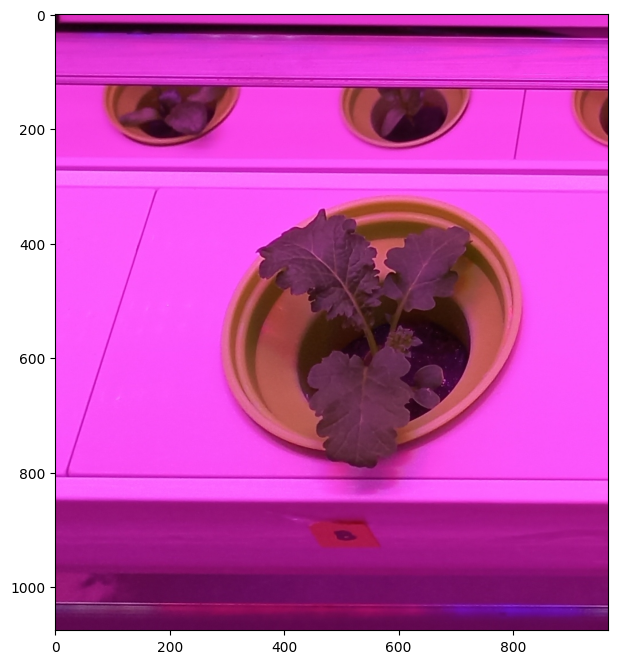

In [22]:
img = cv2.imread(file_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

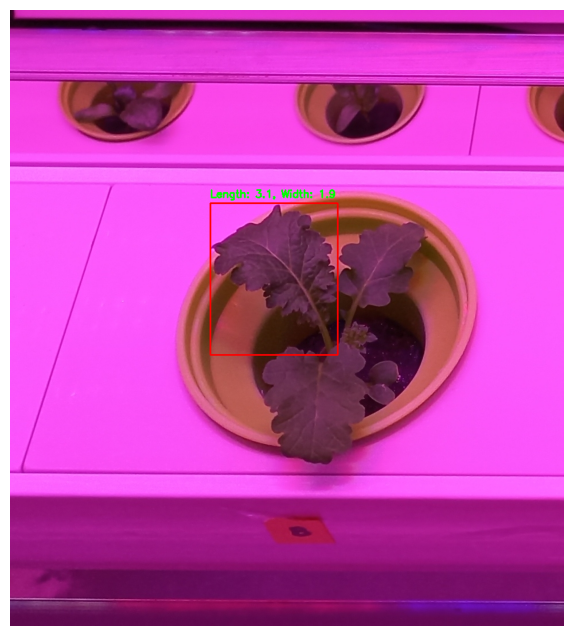

In [24]:
# 바운딩 박스 좌표 변환
gt_box_list = ast.literal_eval(filter_leaf['ann_bbox'][1])
gt_box = list(map(int, gt_box_list))

# 'growth_leaf_length'와 'growth_leaf_width'의 1번째 행 데이터 추출
growth_leaf_length = filter_leaf['growth_leaf_length'][1]
growth_leaf_width = filter_leaf['growth_leaf_width'][1]

# 바운딩 박스 색상
red = (255, 0, 0)

# 이미지에 바운딩 박스 그리기
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[0]+gt_box[2], gt_box[1]+gt_box[3]), color=red, thickness=2)

# 표시할 텍스트 (엽폭과 엽장의 정보를 문자열로 변환)
text = f'Length: {growth_leaf_length}, Width: {growth_leaf_width}'

# 텍스트 위치 지정 (바운딩 박스의 왼쪽 위 좌표를 기준으로)
text_position = (gt_box[0], gt_box[1] - 10)  # 바운딩 박스 위쪽에 텍스트 표시

# 이미지에 텍스트 그리기
cv2.putText(img_rgb, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# 이미지 출력
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')  # 축을 숨김
plt.show()

In [31]:
filter_whole = train_label[train_label['cat_name']=='주']
len(filter_whole)

11410

In [32]:
filter_whole.to_csv('/mnt/aix7206/data/filter_whole.csv', index=False)

In [39]:
filter_whole = pd.read_csv('/mnt/aix7206/data/filter_whole.csv')

In [41]:
root_directory = '/mnt/aix7206/data/' + filter_whole['image_file_path'][1]  # 탐색을 시작할 루트 폴더 경로
file_name = filter_whole['image_fname'][1]  # 찾고자 하는 파일명

file_path = find_file(root_directory, file_name)

img shape: (1062, 917, 3)


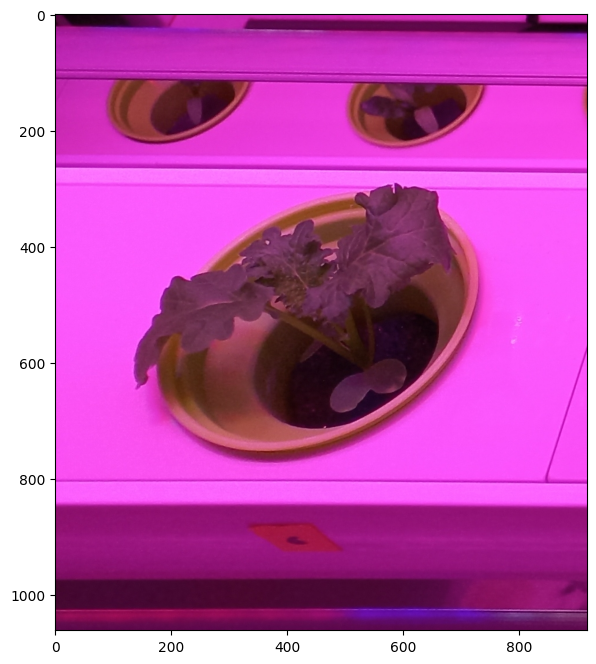

In [42]:
img = cv2.imread(file_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

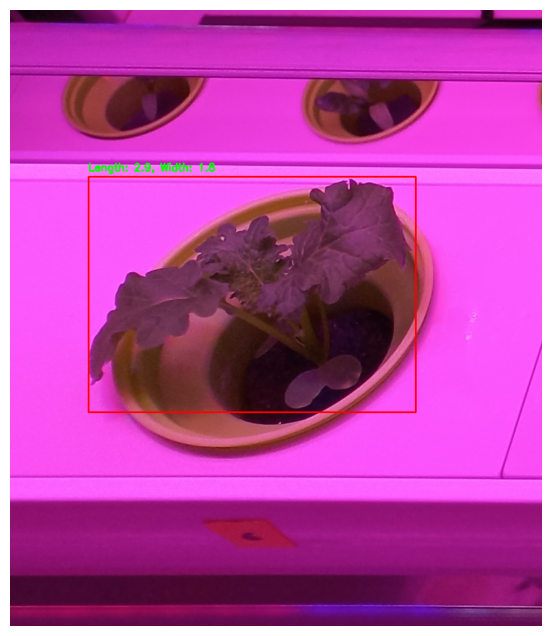

In [43]:
# 바운딩 박스 좌표 변환
gt_box_list = ast.literal_eval(filter_whole['ann_bbox'][1])
gt_box = list(map(int, gt_box_list))

# 'growth_leaf_length'와 'growth_leaf_width'의 1번째 행 데이터 추출
growth_leaf_length = filter_whole['growth_leaf_length'][1]
growth_leaf_width = filter_whole['growth_leaf_width'][1]

# 바운딩 박스 색상
red = (255, 0, 0)

# 이미지에 바운딩 박스 그리기
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[0]+gt_box[2], gt_box[1]+gt_box[3]), color=red, thickness=2)

# 표시할 텍스트 (엽폭과 엽장의 정보를 문자열로 변환)
text = f'Length: {growth_leaf_length}, Width: {growth_leaf_width}'

# 텍스트 위치 지정 (바운딩 박스의 왼쪽 위 좌표를 기준으로)
text_position = (gt_box[0], gt_box[1] - 10)  # 바운딩 박스 위쪽에 텍스트 표시

# 이미지에 텍스트 그리기
cv2.putText(img_rgb, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# 이미지 출력
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')  # 축을 숨김
plt.show()

14098

In [45]:
train = pd.read_csv('/mnt/aix7206/data/train.csv')

/home/aix7206/anaconda3/envs/eunenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
len(train)

541800

In [46]:
len(train[train['cat_name']=='주'])

127422

In [47]:
len(train[train['cat_name']=='잎'])

414378

In [49]:
len(train[train['cat_name'].isnull()])

0

### **재배환경데이터 매칭(train만)**

ffill

In [7]:
train = pd.read_csv('/mnt/aix7206/data/train.csv')
val = pd.read_csv('/mnt/aix7206/data/val.csv')
env_train = pd.read_csv('/mnt/aix7206/data/train_aihub.csv')
env_val = pd.read_csv('/mnt/aix7206/data/val_aihub.csv')

In [29]:
train_ffill = train.fillna(method='ffill') 
train_ffill.to_csv('/mnt/aix7206/data/train_ffill.csv', index=False)

In [64]:
val_ffill = val.fillna(method='ffill')
val_ffill.to_csv('/mnt/aix7206/data/val_ffill.csv', index=False)

In [30]:
env_train_ffill = env_train.fillna(method='ffill') 
env_train_ffill.to_csv('/mnt/aix7206/data/train_aihub_ffill.csv', index=False)

In [31]:
env_val_ffill = env_val.fillna(method='ffill') 
env_val_ffill.to_csv('/mnt/aix7206/data/val_aihub_ffill.csv', index=False)

matching

In [8]:
train_ffill = pd.read_csv('/mnt/aix7206/data/dump/train_ffill.csv')
env_train_ffill = pd.read_csv('/mnt/aix7206/data/dump/train_aihub_ffill.csv')

/home/aix7206/anaconda3/envs/eunenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/aix7206/anaconda3/envs/eunenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
print(len(train_ffill), len(env_train_ffill))

541800 538397


In [10]:
train_ffill.head()

,image_file_path,image_fname,image_date_captured,image_crops,image_leaf,image_plant_body,image_crops_id,image_fext,image_growth_stage,image_width,image_image_id,image_kind_type,image_create_date,image_farm_id,image_height,growth_fr_weight,growth_measured_date,growth_crops_id,growth_leaf_width,growth_stem_thick,growth_leaf_cnt,growth_stem_length,growth_leaf_length,etc_inform,etc_crops_id,etc_create_date,ann_area,ann_isCrowd,ann_category_id,ann_bbox,ann_segmentation,ann_id,ann_image_id,lic_name,lic_id,lic_url,cat_name,cat_supercategory,cat_id,growth_leaf_index,growth_spad,growth_petiole_length
0,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,393345.0,아시아곱슬,2021-10-19,AIF001,1059.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85768.37,0,0,"[461.33, 551.29, 281.42, 304.77]","[461.33, 551.29, 742.75, 551.29, 742.75, 856.0...",0,393345,CCMediaService,1.0,NaN,주,none,0,NaN,NaN,NaN
1,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,393345.0,아시아곱슬,2021-10-19,AIF001,1059.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28347.76,0,1,"[581.61, 550.73, 161.71, 175.3]","[581.61, 550.73, 743.32, 550.73, 743.32, 726.0...",1,393345,CCMediaService,1.0,NaN,잎,none,1,NaN,NaN,NaN
2,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,393345.0,아시아곱슬,2021-10-19,AIF001,1059.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7761.03,0,2,"[634.63, 704.15, 89.31, 86.9]","[634.63, 704.15, 723.94, 704.15, 723.94, 791.0...",2,393345,CCMediaService,1.0,NaN,잎,none,2,NaN,NaN,NaN
3,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,393345.0,아시아곱슬,2021-10-19,AIF001,1059.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12406.74,0,3,"[499.52, 759.47, 129.21, 96.02]","[499.52, 759.47, 628.73, 759.47, 628.73, 855.4...",3,393345,CCMediaService,1.0,NaN,잎,none,3,NaN,NaN,NaN
4,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,393345.0,아시아곱슬,2021-10-19,AIF001,1059.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13972.27,0,4,"[461.33, 696.73, 169.69, 82.34]","[461.33, 696.73, 631.02, 696.73, 631.02, 779.0...",4,393345,CCMediaService,1.0,NaN,잎,none,4,NaN,NaN,NaN


In [11]:
env_train_ffill.head()

,image_image_id,image_farm_id,image_crops_id,image_crops,image_kind_type,image_file_path,image_fname,image_fext,image_width,image_height,image_create_date,image_date_captured,image_growth_stage,image_leaf,image_plant_body,env_farm_id,env_receive_date,env_id,env_ti_value,env_hi_value,env_ci_value,env_ir_value,env_tl_value,env_ei_value,env_pl_value,growth_corps_id,growth_measured_date,growth_stem_length,growth_leaf_cnt,growth_leaf_width,growth_leaf_length,growth_stem_thick,growth_fr_weight,etc_corps_id,etc_create_date,etc_inform,ann_segmentation,ann_area,ann_bbox,ann_isCrowd,ann_id,ann_image_id,ann_category_id,lic_id,lic_name,lic_url,cat_id,cat_name,cat_supercategory,growth_petiole_length,growth_leaf_index,growth_spad
0,4916.0,AIF002,C27_L03_01,겨자채,아시아곱슬,/cropsImages/L/L03/AIF002/C27,C27_L03_01_001_210909124517.jpg,jpg,838.0,764.0,2021-10-05,2021-09-09 12:45:17,정식기,1.0,1.0,AIF002,2021-09-09 12:45:04,0.0,22.0,56.0,445.0,210.0,21.1,0.17,5.5,C27_L03_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C27_L03_01,NaN,NaN,"[391, 72.25, 806, 72.25, 806, 414.25, 391, 414...",141930.0,"[391, 72.25, 415, 342]",0.0,0.0,4916.0,0.0,1.0,CCMediaService,NaN,0.0,잎,none,NaN,NaN,NaN
1,4916.0,AIF002,C27_L03_01,겨자채,아시아곱슬,/cropsImages/L/L03/AIF002/C27,C27_L03_01_001_210909124517.jpg,jpg,838.0,764.0,2021-10-05,2021-09-09 12:45:17,정식기,1.0,1.0,AIF002,2021-09-09 12:41:02,1.0,22.0,57.0,447.0,222.0,21.0,0.17,5.5,C27_L03_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C27_L03_01,NaN,NaN,"[303, 28.25, 492, 28.25, 492, 322.25, 303, 322...",55566.0,"[303, 28.25, 189, 294]",0.0,1.0,4916.0,1.0,1.0,CCMediaService,NaN,1.0,잎,none,NaN,NaN,NaN
2,4916.0,AIF002,C27_L03_01,겨자채,아시아곱슬,/cropsImages/L/L03/AIF002/C27,C27_L03_01_001_210909124517.jpg,jpg,838.0,764.0,2021-10-05,2021-09-09 12:45:17,정식기,1.0,1.0,AIF002,2021-09-09 12:41:02,1.0,22.0,57.0,447.0,222.0,21.0,0.17,5.5,C27_L03_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C27_L03_01,NaN,NaN,"[1, 110.25, 385, 110.25, 385, 399.25, 1, 399.25]",110976.0,"[1, 110.25, 384, 289]",0.0,2.0,4916.0,2.0,1.0,CCMediaService,NaN,2.0,잎,none,NaN,NaN,NaN
3,4916.0,AIF002,C27_L03_01,겨자채,아시아곱슬,/cropsImages/L/L03/AIF002/C27,C27_L03_01_001_210909124517.jpg,jpg,838.0,764.0,2021-10-05,2021-09-09 12:45:17,정식기,1.0,1.0,AIF002,2021-09-09 12:41:02,1.0,22.0,57.0,447.0,222.0,21.0,0.17,5.5,C27_L03_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C27_L03_01,NaN,NaN,"[241, 172.25, 366, 172.25, 366, 322.25, 241, 3...",18750.0,"[241, 172.25, 125, 150]",0.0,3.0,4916.0,3.0,1.0,CCMediaService,NaN,3.0,잎,none,NaN,NaN,NaN
4,4916.0,AIF002,C27_L03_01,겨자채,아시아곱슬,/cropsImages/L/L03/AIF002/C27,C27_L03_01_001_210909124517.jpg,jpg,838.0,764.0,2021-10-05,2021-09-09 12:45:17,정식기,1.0,1.0,AIF002,2021-09-09 12:41:02,1.0,22.0,57.0,447.0,222.0,21.0,0.17,5.5,C27_L03_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C27_L03_01,NaN,NaN,"[348, 317.25, 399, 317.25, 399, 373.25, 348, 3...",2856.0,"[348, 317.25, 51, 56]",0.0,4.0,4916.0,4.0,1.0,CCMediaService,NaN,4.0,잎,none,NaN,NaN,NaN


In [24]:
# 'env'로 시작하는 열 필터링
env_columns = [col for col in env_train_ffill.columns if col.startswith('env')]

# 'image_date_captured'와 'ann_bbox' 기준으로 두 데이터프레임을 병합
merged_df_train = pd.merge(
    train_ffill,
    env_train_ffill[['image_date_captured', 'ann_bbox', 'ann_area', 'ann_segmentation', 'ann_image_id', 'image_create_date', 'ann_id'] + env_columns], 
    on=['image_date_captured', 'ann_bbox', 'ann_area', 'ann_segmentation', 'ann_image_id', 'image_create_date', 'ann_id'], 
    how='left'
)

len(merged_df_train)

541800

In [25]:
merged_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541800 entries, 0 to 541799
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   image_file_path        541800 non-null  object 
 1   image_fname            541800 non-null  object 
 2   image_date_captured    541800 non-null  object 
 3   image_crops            541800 non-null  object 
 4   image_leaf             541800 non-null  float64
 5   image_plant_body       541800 non-null  float64
 6   image_crops_id         541800 non-null  object 
 7   image_fext             541800 non-null  object 
 8   image_growth_stage     541800 non-null  object 
 9   image_width            541800 non-null  float64
 10  image_image_id         541800 non-null  float64
 11  image_kind_type        541800 non-null  object 
 12  image_create_date      541800 non-null  object 
 13  image_farm_id          541800 non-null  object 
 14  image_height           541800 non-nu

In [29]:
merged_df_train.to_csv('train_env.csv', index=False)

### **bbox 수정**

In [3]:
train_env = pd.read_csv('/mnt/aix7206/data/dump/train_env.csv')

/home/aix7206/anaconda3/envs/eunenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
train_env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541800 entries, 0 to 541799
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   image_file_path        541800 non-null  object 
 1   image_fname            541800 non-null  object 
 2   image_date_captured    541800 non-null  object 
 3   image_crops            541800 non-null  object 
 4   image_leaf             541800 non-null  float64
 5   image_plant_body       541800 non-null  float64
 6   image_crops_id         541800 non-null  object 
 7   image_fext             541800 non-null  object 
 8   image_growth_stage     541800 non-null  object 
 9   image_width            541800 non-null  float64
 10  image_image_id         541800 non-null  float64
 11  image_kind_type        541800 non-null  object 
 12  image_create_date      541800 non-null  object 
 13  image_farm_id          541800 non-null  object 
 14  image_height           541800 non-nu

In [5]:
train_env.head()

,image_file_path,image_fname,image_date_captured,image_crops,image_leaf,image_plant_body,image_crops_id,image_fext,image_growth_stage,image_width,...,env_farm_id,env_receive_date,env_id,env_ti_value,env_hi_value,env_ci_value,env_ir_value,env_tl_value,env_ei_value,env_pl_value
0,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,...,AIF001,2021-09-03 14:10:59,0.0,22.0,52.0,387.0,114.0,21.6,0.11,4.0
1,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,...,AIF001,2021-09-03 14:06:57,1.0,22.0,52.0,360.0,49.0,21.4,0.11,4.0
2,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,...,AIF001,2021-09-03 14:06:57,1.0,22.0,52.0,360.0,49.0,21.4,0.11,4.0
3,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,...,AIF001,2021-09-03 14:06:57,1.0,22.0,52.0,360.0,49.0,21.4,0.11,4.0
4,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,...,AIF001,2021-09-03 14:06:57,1.0,22.0,52.0,360.0,49.0,21.4,0.11,4.0


In [8]:
def modify_bbox(bbox):
    # 소수점 제거
    bbox = ast.literal_eval(bbox)
    bbox = [int(value) for value in bbox]
    # bbox 수정
    bbox[2] = bbox[0] + bbox[2]
    bbox[3] = bbox[1] + bbox[3]
    
    return bbox

train_env['ann_bbox_new'] = train_env['ann_bbox'].apply(modify_bbox)


In [9]:
train_env.head()

,image_file_path,image_fname,image_date_captured,image_crops,image_leaf,image_plant_body,image_crops_id,image_fext,image_growth_stage,image_width,...,env_receive_date,env_id,env_ti_value,env_hi_value,env_ci_value,env_ir_value,env_tl_value,env_ei_value,env_pl_value,ann_bbox_new
0,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,...,2021-09-03 14:10:59,0.0,22.0,52.0,387.0,114.0,21.6,0.11,4.0,"[461, 551, 742, 855]"
1,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,...,2021-09-03 14:06:57,1.0,22.0,52.0,360.0,49.0,21.4,0.11,4.0,"[581, 550, 742, 725]"
2,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,...,2021-09-03 14:06:57,1.0,22.0,52.0,360.0,49.0,21.4,0.11,4.0,"[634, 704, 723, 790]"
3,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,...,2021-09-03 14:06:57,1.0,22.0,52.0,360.0,49.0,21.4,0.11,4.0,"[499, 759, 628, 855]"
4,/100.지능형 수직농장 통합 데이터(엽채류)/01.데이터/1.Training/원천데이터,C02_L03_01_001_393345.jpg,2021-09-03 14:11:05,겨자채,1.0,1.0,C02_L03_01,jpg,정식기,913.0,...,2021-09-03 14:06:57,1.0,22.0,52.0,360.0,49.0,21.4,0.11,4.0,"[461, 696, 630, 778]"


In [10]:
train_env.to_csv('train_final.csv', index=False)